In [42]:
import mercury as mr
import seaborn as sns
import os

print("Mercury's working directory:", os.getcwd())
print("Directory contents:", os.listdir('.'))  # Should include 'src' [5][9]

sns.set()

show_code = mr.Checkbox(value=False, label="Show source code")
app = mr.App(title="PER2024–030: Fairness", description="Fairness in Machine Learning Models", show_code=show_code.value, continuous_update=False)

Mercury's working directory: /Users/bencezsoltberegi/PycharmProjects/FairnessPER
Directory contents: ['test_fairness.ipynb', '.DS_Store', 'requirements.txt', 'fairness-frontend-v2.ipynb', 'celerybeat-schedule.db', 'demo.ipynb', 'proto_visualization.ipynb', 'fairness-frontend.ipynb', 'GermanCredit.csv', 'django-errors.log', 'mycert.pem', '_config.yml', '.venv', '.ipynb_checkpoints', '.git', 'nezd_meg_pali.zip', 'data', 'mykey.key', '.idea', 'src', 'visualization_techniques.ipynb']


mercury.Checkbox

mercury.App

Please select all attributes from the uploaded dataset according to the characteristics. Click the green _Run_ button below to continue the execution.

---

                  status  duration                            credit_history  \
0           ... < 100 DM         6   critical account/other credits existing   
1      0 <= ... < 200 DM        48  existing credits paid back duly till now   
2    no checking account        12   critical account/other credits existing   
3           ... < 100 DM        42  existing credits paid back duly till now   
4           ... < 100 DM        24           delay in paying off in the past   
..                   ...       ...                                       ...   
995  no checking account        12  existing credits paid back duly till now   
996         ... < 100 DM        30  existing credits paid back duly till now   
997  no checking account        12  existing credits paid back duly till now   
998         ... < 100 DM        45  existing credits paid back duly till now   
999    0 <= ... < 200 DM        45   critical account/other credits existing   

                 purpose  amount       

mercury.MultiSelect

mercury.MultiSelect

mercury.Select

---

mercury.MultiSelect

Not necessary to provide any protected attribute. Later, you can choose to rerun the tool.

Numerical attributes: ['age', 'duration']
Categorical attributes: ['job', 'purpose', 'telephone', 'foreign_worker']
Prediction attribute: credit_risk
Protected attributes: ['status']


**Dataset Dimensions:** 1000 rows × 21 columns

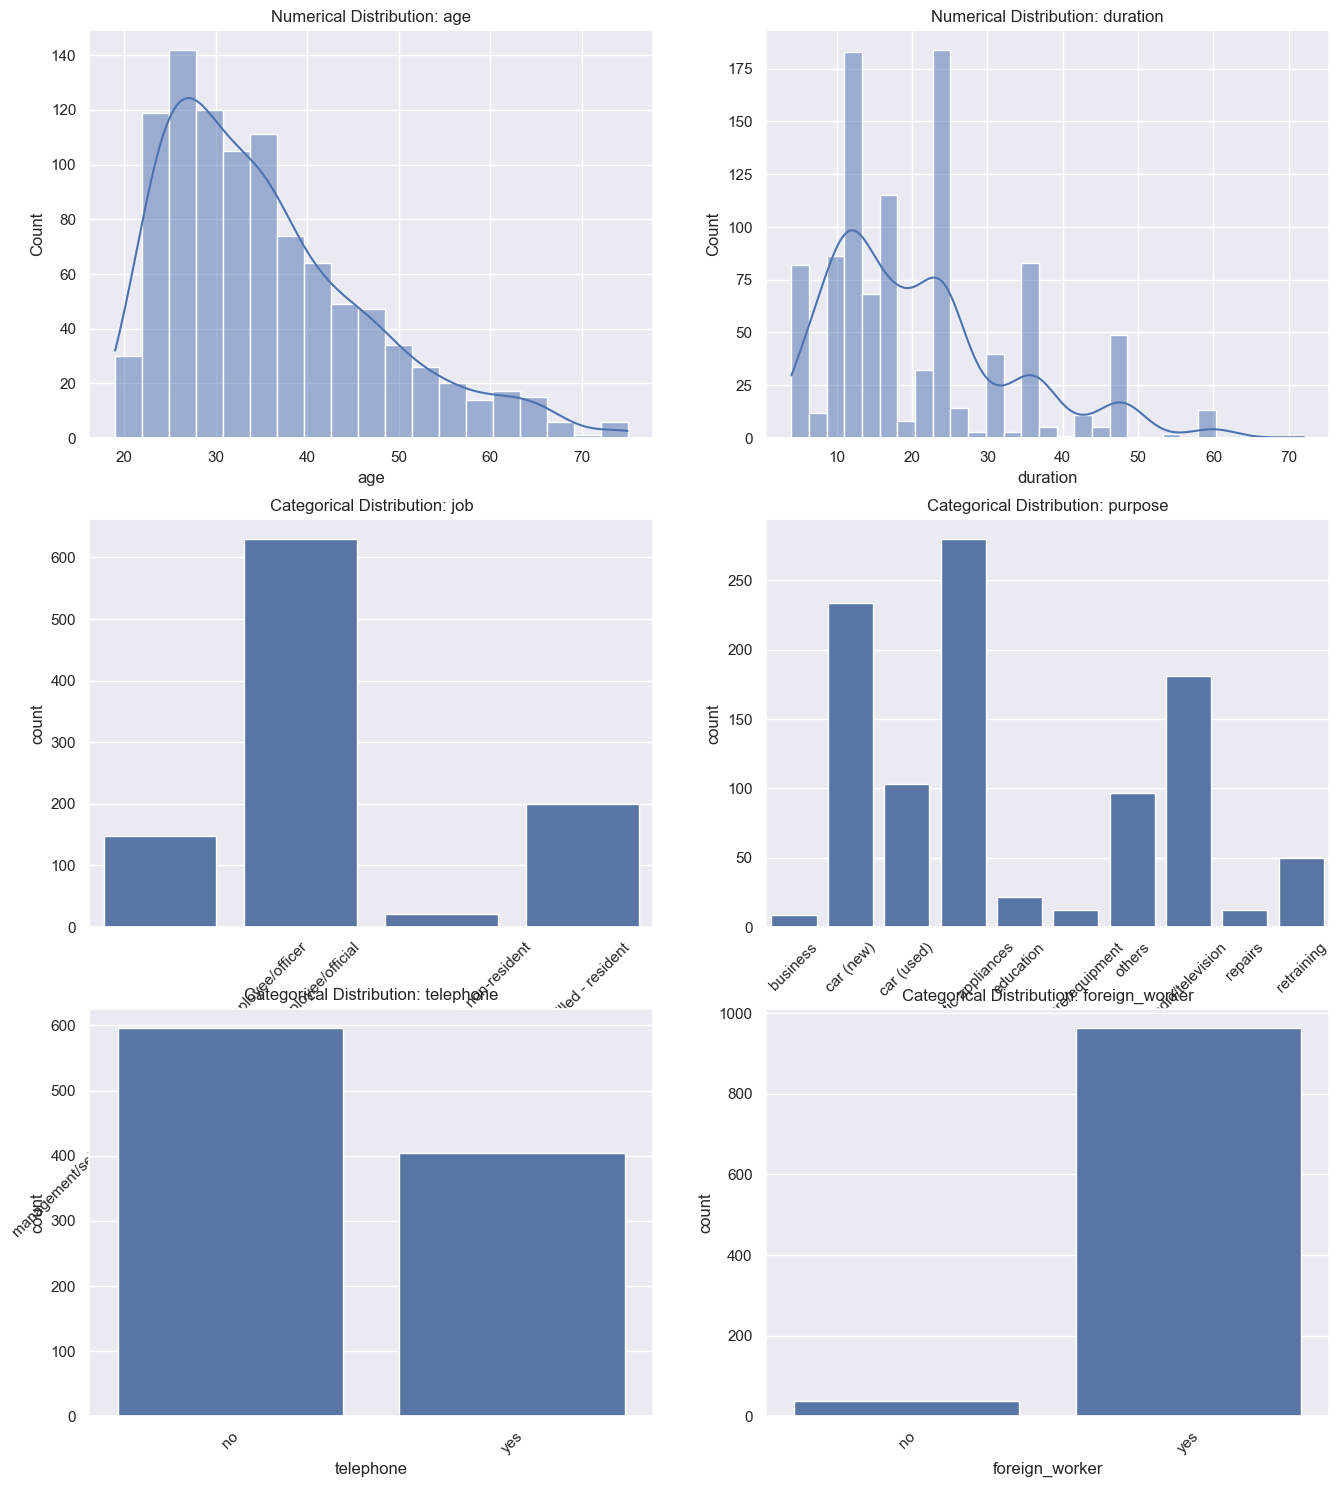

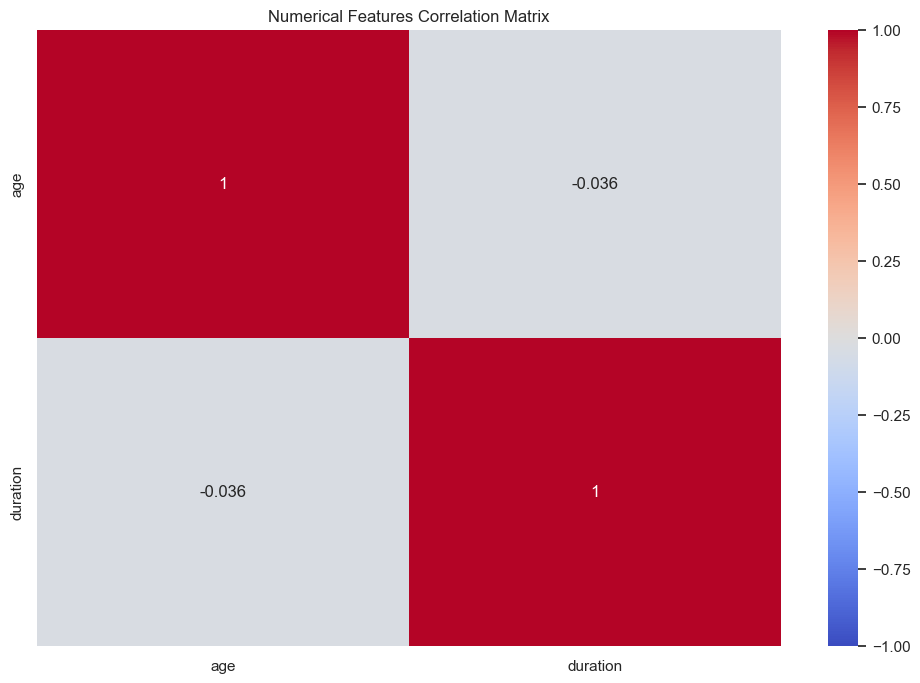

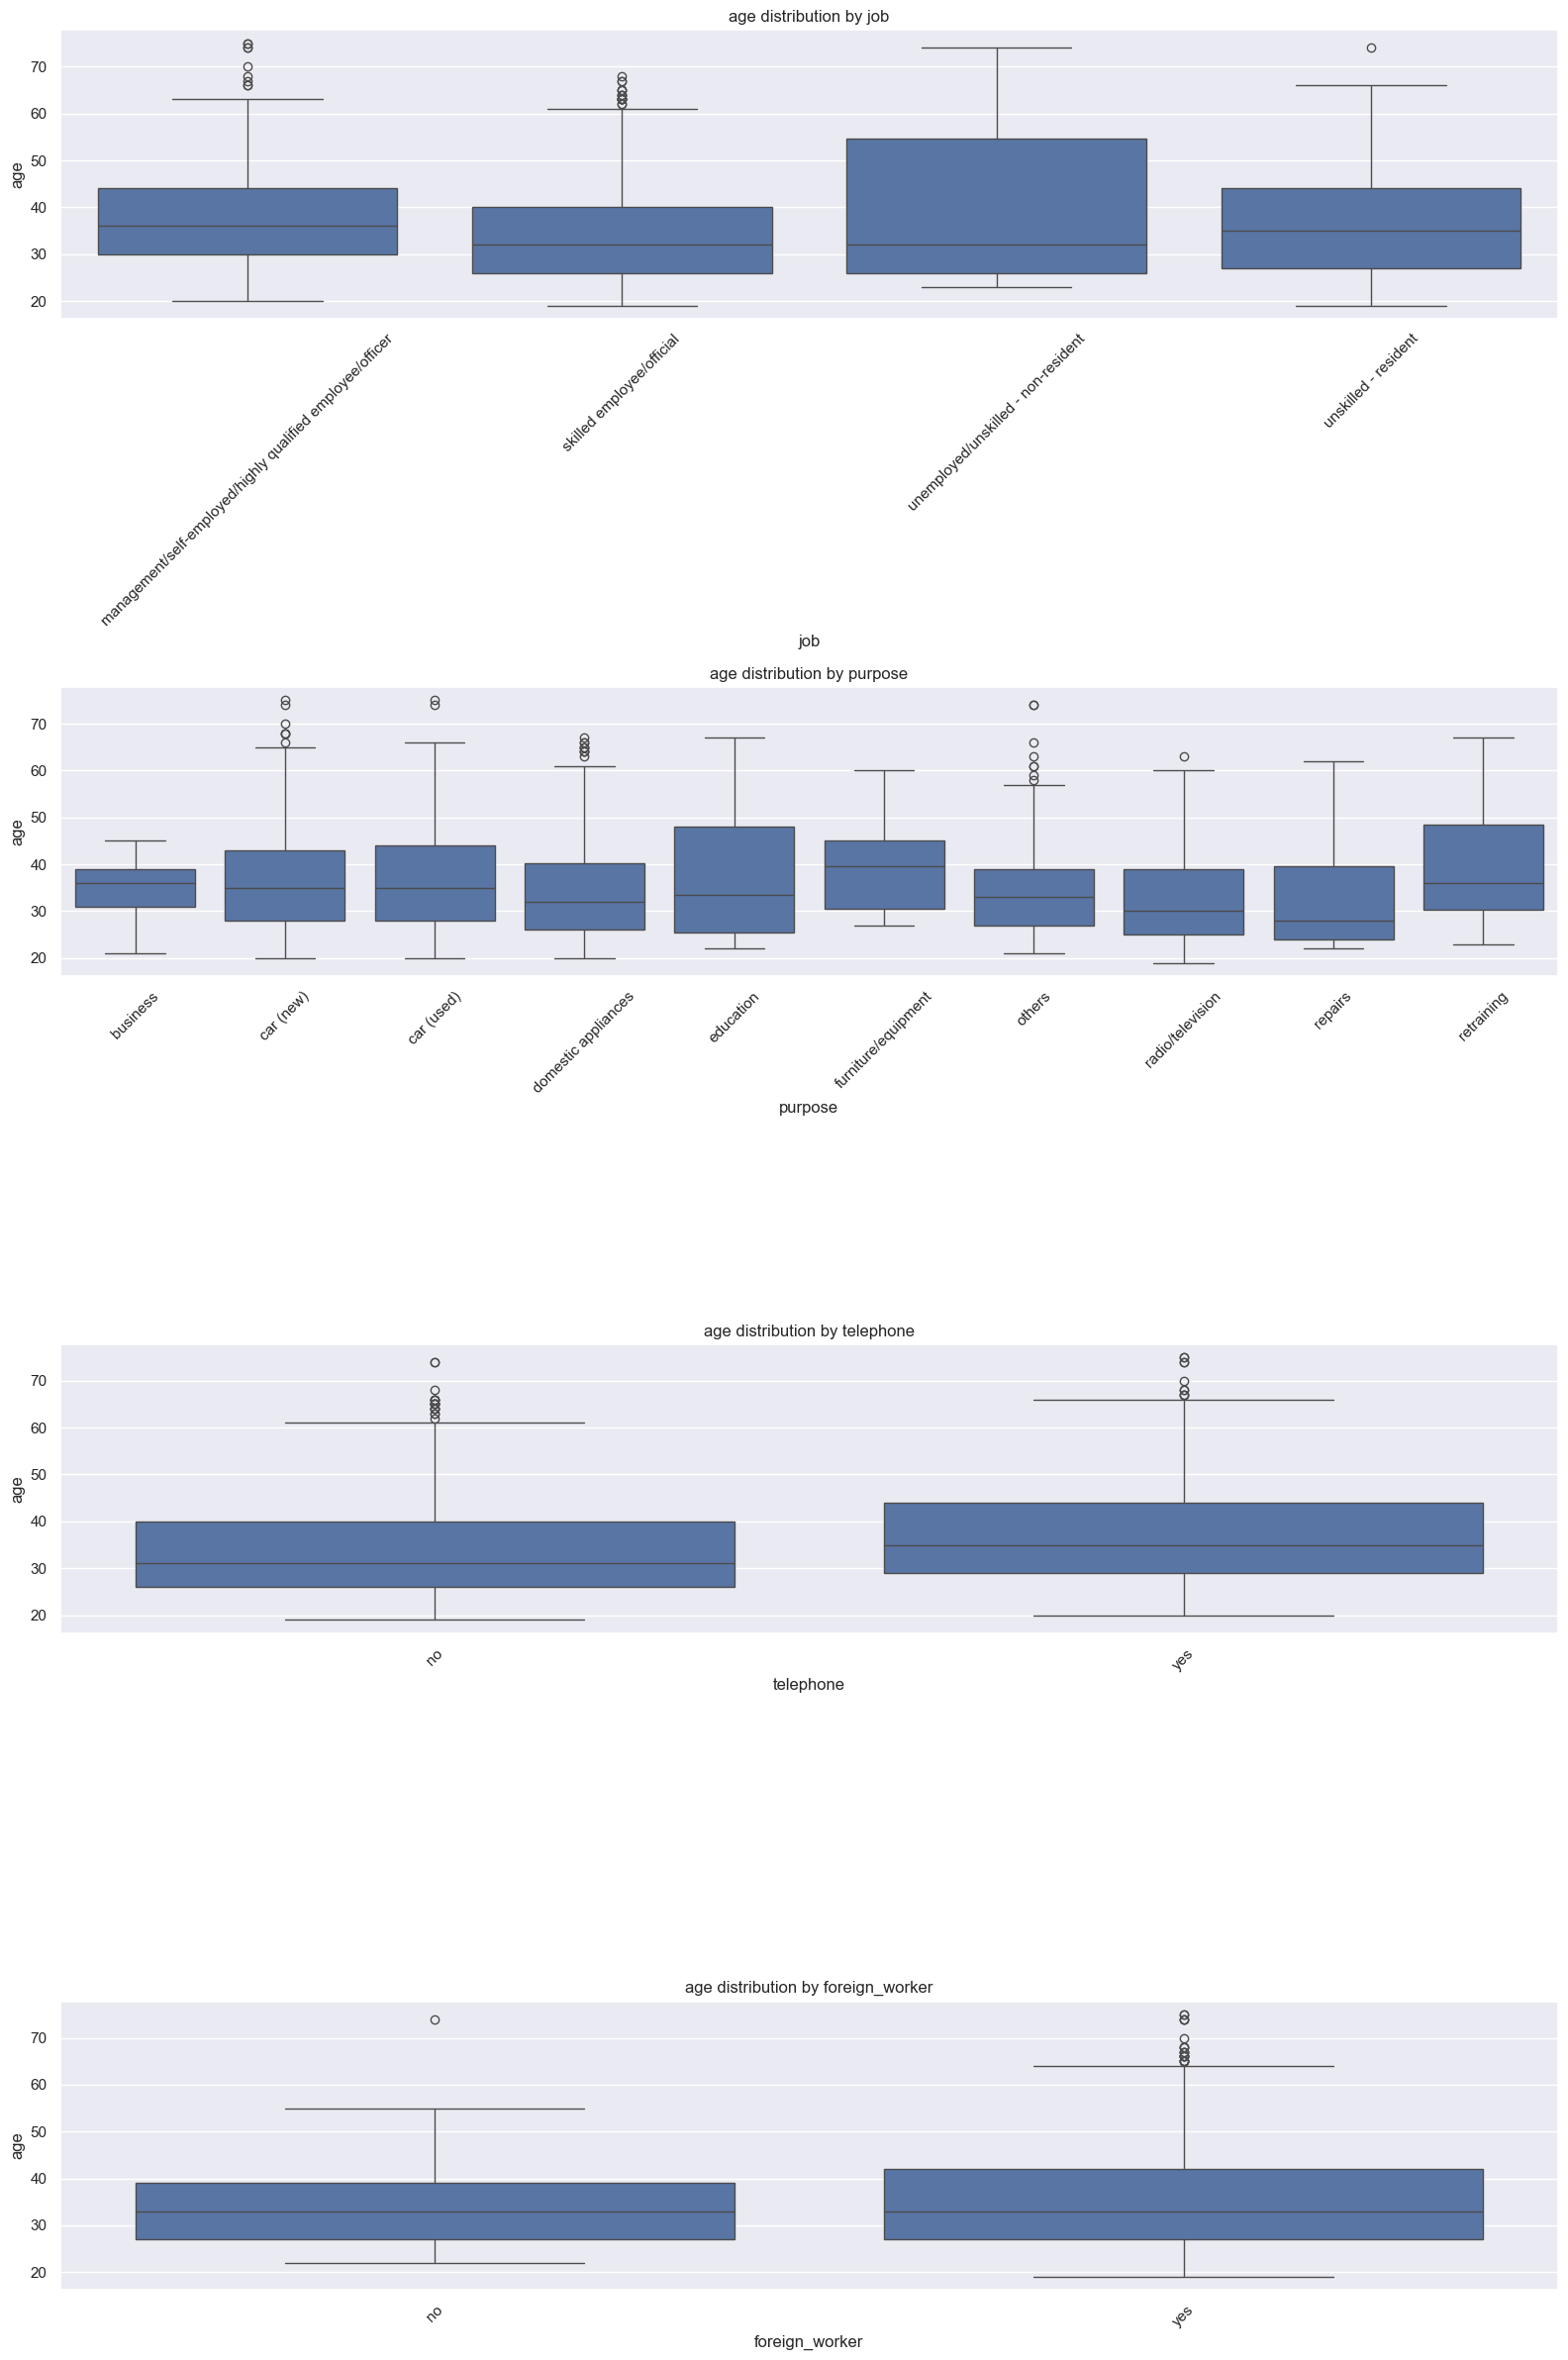

<Figure size 640x480 with 0 Axes>

In [43]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mercury as mr

data_file = None

# File upload
"""data_file = mr.File(label="Upload dataset (CSV)", max_file_size="20MB")
if not data_file.filepath:
    _ = mr.Note(text="After successful upload click the green _Run_ button below.")
    mr.Stop()"""

# emp_df = pd.read_csv(data_file.filepath)
emp_df = pd.read_csv('GermanCredit.csv')
column_names = emp_df.columns.tolist()
_ = mr.Note(text="Please select all attributes from the uploaded dataset according to the characteristics. Click the green _Run_ button below to continue the execution.")

# MultiSelect widgets for column classification
_ = mr.Note(text="---")
print(emp_df)
numerical_columns = mr.MultiSelect(label="Select All Numerical Attributes*", choices=column_names, value=['age', 'duration'])
categorical_columns = mr.MultiSelect(label="Select All Categorical Attributes*", choices=column_names, value=['job', 'purpose', 'telephone', 'foreign_worker'])
prediction_column = mr.Select(label="Select The Prediction Attribute*", choices=column_names, value='credit_risk')

_ = mr.Note(text="---")
protected_columns = mr.MultiSelect(label="Select Protected Attributes", choices=column_names, value=[])
_ = mr.Note(text="Not necessary to provide any protected attribute. Later, you can choose to rerun the tool.")

print("Numerical attributes:", numerical_columns.value)
print("Categorical attributes:", categorical_columns.value)
print("Prediction attribute:", prediction_column.value)
print("Protected attributes:", protected_columns.value)

# Check: Ensure no column is selected in both numerical and categorical
overlap_numerical_categorical = set(numerical_columns.value) & set(categorical_columns.value)
error_message = ""

if overlap_numerical_categorical:
    overlap_str = ", ".join(overlap_numerical_categorical)  # Convert set to comma-separated string
    error_message += f"**Warning:** The following columns are selected as both numerical and categorical: {overlap_str}<br>"

if not prediction_column.value:
    error_message += "**Warning:** No columns selected for prediction.<br>"

if not protected_columns.value:
    mr.Markdown(text=f'##**Info:** No protected attributes selected.')

if not error_message:
    # Convert selected columns to appropriate types
    emp_df[numerical_columns.value] = emp_df[numerical_columns.value].apply(pd.to_numeric, errors='coerce')
    emp_df[categorical_columns.value] = emp_df[categorical_columns.value].astype('category')

# Show dataset summary
mr.Md(f"**Dataset Dimensions:** {emp_df.shape[0]} rows × {emp_df.shape[1]} columns")

# Create figure with dynamic subplots
num_numerical = len(numerical_columns.value)
num_categorical = len(categorical_columns.value)

# Calculate grid dimensions
total_plots = num_numerical + num_categorical
cols = 2 if total_plots > 1 else 1
rows = (total_plots + cols - 1) // cols

# Create main figure
fig = plt.figure(figsize=(16, 6 * rows))
gs = fig.add_gridspec(rows, cols)

plot_idx = 0

# Plot numerical distributions
for col in numerical_columns.value:
    ax = fig.add_subplot(gs[plot_idx // cols, plot_idx % cols])
    sns.histplot(emp_df[col], kde=True, ax=ax)
    ax.set_title(f"Numerical Distribution: {col}")
    plot_idx += 1

# Plot categorical distributions
for col in categorical_columns.value:
    ax = fig.add_subplot(gs[plot_idx // cols, plot_idx % cols])
    sns.countplot(x=col, data=emp_df, ax=ax)
    ax.set_title(f"Categorical Distribution: {col}")
    ax.tick_params(axis='x', rotation=45)
    plot_idx += 1

# Plot numerical relationships if multiple numerical columns
if num_numerical >= 2:
    corr_fig = plt.figure(figsize=(12, 8))
    sns.heatmap(emp_df[numerical_columns.value].corr(),
               annot=True, cmap='coolwarm',
               vmin=-1, vmax=1)
    plt.title("Numerical Features Correlation Matrix")
    plt.show()

# Plot numerical vs categorical relationships
if num_numerical >= 1 and num_categorical >= 1:
    combo_fig = plt.figure(figsize=(16, 6 * num_categorical))
    for idx, cat_col in enumerate(categorical_columns.value):
        ax = combo_fig.add_subplot(num_categorical, 1, idx+1)
        sns.boxplot(x=cat_col, y=numerical_columns.value[0],
                   data=emp_df, ax=ax)
        ax.set_title(f"{numerical_columns.value[0]} distribution by {cat_col}")
        ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

plt.tight_layout()
plt.show()

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

import warnings
from copy import deepcopy

In [45]:
X = deepcopy(emp_df).drop(prediction_column.value, axis=1).dropna()
y = emp_df[prediction_column.value].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
X_train_num, X_test_num = X_train[numerical_columns.value], X_test[numerical_columns.value]
X_train_cat, X_test_cat = X_train[categorical_columns.value], X_test[categorical_columns.value]

scaler = Normalizer()
X_train_scaled_tmp = scaler.fit_transform(X_train_num)
X_test_scaled_tmp = scaler.transform(X_test_num)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded_tmp = encoder.fit_transform(X_train_cat)
X_test_encoded_tmp = encoder.transform(X_test_cat)

X_train_scaled = pd.DataFrame(X_train_scaled_tmp, columns=X_train_num.columns, index=X_train_num.index)
X_test_scaled = pd.DataFrame(X_test_scaled_tmp, columns=X_test_num.columns, index=X_test_num.index)

encoded_feature_names = encoder.get_feature_names_out(X_train_cat.columns)
X_train_encoded = pd.DataFrame(X_train_encoded_tmp, columns=encoded_feature_names, index=X_train_cat.index)
X_test_encoded = pd.DataFrame(X_test_encoded_tmp, columns=encoded_feature_names, index=X_test_cat.index)

X_train_processed = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_processed = pd.concat([X_test_scaled, X_test_encoded], axis=1)

In [47]:
import time

classifier = SGDClassifier(random_state=42)
param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'learning_rate': ['constant', 'invscaling', 'adaptive', 'optimal'],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000],
    'eta0': [1e-2, 1e-3, 1e-4, 1e-5]
}


grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Start timer
start_time = time.time()

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    grid_search.fit(X_train_processed, y_train)  # Training happens here

# Calculate duration
training_time = time.time() - start_time
print(f"Grid search training completed in {training_time:.2f} seconds")

# Get best params (unchanged)
best_params = grid_search.best_params_

Grid search training completed in 4.11 seconds


In [48]:
model = SGDClassifier(**best_params)
model.fit(X_train_processed, y_train)

y_pred = model.predict(X_test_processed)

import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import plotly.express as px
from plotly.subplots import make_subplots

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
classes = sorted(y_test.unique())

# Create confusion matrix heatmap
conf_fig = go.Figure(go.Heatmap(
    z=conf_matrix,
    colorbar=dict(
        x=0.45,  # Positions between subplots
        y=0.5,
        len=0.7
    ),
    x=[f'Predicted {'false' if c == 0 else 'true'}' for c in classes],
    y=[f'Actual {'false' if c == 0 else 'true'}' for c in classes],
    colorscale='Blues',
    text=conf_matrix,
    texttemplate="%{text}",
    hovertemplate="Actual: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>"
))
conf_fig.update_layout(
    title='Prediction Distribution',
    width=500,
    height=500
)

# Create metrics radar chart
metrics_fig = go.Figure()
for i, c in enumerate(classes):
    metrics_fig.add_trace(go.Scatterpolar(
        r=[precision[i], recall[i], f1[i]],
        theta=['Precision', 'Recall', 'F1-Score'],
        fill='toself',
        name=f'{'False' if c == 0 else 'True'}'
    ))
metrics_fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Class Performance Metrics',
    width=600,
    height=400
)

# Create combined visualization
final_fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "heatmap"}, {"type": "scatterpolar"}]],
    subplot_titles=('Prediction Patterns', 'Class Performance Radar')
)

for trace in conf_fig.data:
    final_fig.add_trace(trace, row=1, col=1)

for trace in metrics_fig.data:
    final_fig.add_trace(trace, row=1, col=2)

final_fig.update_layout(
    height=500,
    showlegend=True,
    margin=dict(l=50, r=50, b=50, t=50)
)

final_fig.show()


In [49]:
from src.metric_calculation import FairnessMetrics

# Assuming model, y_test, and X_test_processed are already defined
metrics = FairnessMetrics(model, y_test, X_test_processed)

# Fetch false negative and false positive rates for job categories
job_false_negative = metrics.false_negative_rate('job')
job_false_positive = metrics.false_positive_rate('job')

# Extract categories and values
categories = list(job_false_negative.keys())
false_negative_values = list(job_false_negative.values())
false_positive_values = [job_false_positive.get(cat, 0) for cat in categories]  # Match categories or default to 0

# Calculate complementary rates (True Positive/Negative Rates)
tpr = {cat: 1 - fnr for cat, fnr in job_false_negative.items()}
tnr = {cat: 1 - fpr for cat, fpr in job_false_positive.items()}

# Create horizontal stacked bars
fig = go.Figure()

fig.add_trace(go.Bar(
    y=categories,
    x=[tnr[cat] for cat in categories],
    name='True Negative',
    orientation='h',
    marker=dict(color='#2ca02c', line=dict(width=0)),  # Green
    text=[f'{tnr[cat]:.1%}' for cat in categories],
    textposition='inside',
    textfont=dict(color='white'),
    offsetgroup=2,
    base=false_positive_values
))

## Actual Positives Section (False Negative vs True Positive) ##
fig.add_trace(go.Bar(
    y=categories,
    x=false_negative_values,
    name='False Negative',
    orientation='h',
    marker=dict(color='#ff7f0e', line=dict(width=0)),  # Orange
    text=[f'{val:.1%}' for val in false_negative_values],
    textposition='inside',
    textfont=dict(color='white'),
    offsetgroup=1
))

fig.add_trace(go.Bar(
    y=categories,
    x=[tpr[cat] for cat in categories],
    name='True Positive',
    orientation='h',
    marker=dict(color='#1f77b4', line=dict(width=0)),  # Blue
    text=[f'{tpr[cat]:.1%}' for cat in categories],
    textposition='inside',
    textfont=dict(color='white'),
    offsetgroup=1,
    base=false_negative_values
))

## Actual Negatives Section (False Positive vs True Negative) ##
fig.add_trace(go.Bar(
    y=categories,
    x=false_positive_values,
    name='False Positive',
    orientation='h',
    marker=dict(color='#d62728', line=dict(width=0)),  # Red
    text=[f'{val:.1%}' for val in false_positive_values],
    textposition='inside',
    textfont=dict(color='white'),
    offsetgroup=2
))

## Layout Configuration ##
fig.update_layout(
    barmode='group',
    title="Job Category Performance: Error vs Correct Rates",
    xaxis=dict(
        title="Rate",
        range=[0, 1],
        tickformat=".0%"
    ),
    yaxis=dict(title="Job Categories"),
    plot_bgcolor='white',
    bargap=0.2,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    height=600
)

## Key Annotations ##
fig.add_annotation(
    text="<b>Left Side:</b> Prediction Errors | <b>Right Side:</b> Correct Predictions<br>"
         "Ideal scenario shows only blue (True Positive) and green (True Negative)",
    xref="paper", yref="paper",
    x=0.5, y=-0.18,
    showarrow=False,
    align="center",
    font=dict(size=12)
)

fig.show()



In [50]:
top_3_categories = (
    metrics.correlation_to_prediction()
    .abs()
    .sort_values(ascending=False)
    .index
    .to_series()
    .map(metrics.correlation_to_prediction())
    .head(3)
)

categories = top_3_categories.index
correlations = top_3_categories.values

# Create visualization with enhanced elements
fig = go.Figure()

# Main correlation bars
fig.add_trace(go.Bar(
    x=categories,
    y=correlations,
    marker=dict(
        color=correlations,
        colorscale='Bluered',
        line=dict(color='DarkSlateGrey', width=1.5)
    ),
    text=[f'Correlation: {val:.2f}' for val in correlations],
    textposition='outside',
    textfont=dict(color='black'),
    hoverinfo='text+x'
))

# Reference lines and zones
reference_lines = [
    (0.0, "green", "dash", "Neutral Correlation"),
    (0.5, "orange", "dot", "Strong Positive"),
    (-0.5, "purple", "dot", "Strong Negative")
]

for value, color, dash, name in reference_lines:
    fig.add_hline(
        y=value,
        line=dict(color=color, dash=dash),
        annotation_text=name,
        annotation_position="right"
    )

# Adjust the layout to make the bar plot smaller
fig.update_layout(
    title=dict(
        text="Top Correlations with Prediction Values",
        x=0.,
        font=dict(size=20)
    ),
    xaxis=dict(
        title="Categories",
        tickangle=45,
        gridcolor='lightgray',
        domain=[0.2, 0.8]  # Shrink the horizontal size of the bar plot
    ),
    yaxis=dict(
        title="Correlation Strength",
        range=[-1.1, 1.1],
        gridcolor='lightgray',
        zerolinecolor='black',
        domain=[0.1, 0.9]  # Shrink the vertical size of the bar plot
    ),
    plot_bgcolor='white',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12
    ),
    margin=dict(l=50, r=50, t=50, b=100)  # Adjust margins to fit everything nicely
)

# Add explanatory annotation at bottom
fig.add_annotation(
    text="Interpretation Guide:<br>"
         "• Values near ±1 indicate strong relationships<br>"
         "• Values near 0 suggest weak relationships, which is the target",
    xref="paper", yref="paper",
    x=0.5,  # Center horizontally
    y=-0.15,  # Position below plot
    showarrow=False,
    align="center",
    font=dict(color="#666666"),
    yanchor="top"
)

fig.show()


In [51]:
# Group categorical features using startswith
original_features = categorical_columns.value

# Find all one-hot encoded columns matching original features
categorical_cols = [
    col for col in X_test_processed.columns
    if any(col.startswith(f"{feature}_") for feature in original_features)
]

# Create categorical data with original encoded column names
categorical_data = X_test_processed[categorical_cols]

# Collect results from your existing analysis
features, parities = zip(*metrics.get_statistical_parity(
    X_test_processed[numerical_columns.value],
    categorical_data
))

# Create color coding for visualization
colors = ['#E74C3C' if p > 0 else '#3498DB' for p in parities]  # Red for positive, blue for negative

# Create interactive bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=features,
    x=parities,
    orientation='h',
    marker_color=colors,
    hovertemplate="<b>%{y}</b><br>Parity: %{x:.4f}<extra></extra>"
))

# Add fairness target reference lines
fig.add_vline(
    x=0,
    line=dict(color="green", dash="dash", width=2),
    annotation_text="Perfect Fairness",
    annotation_position="top right"
)

# Add threshold area for acceptable range
fig.add_vrect(
    x0=-0.1, x1=0.1,
    fillcolor="lightgreen", opacity=0.2,
    layer="below", line_width=0
)

# Customize layout
fig.update_layout(
    title="Fairness Analysis: Statistical Parity Differences",
    xaxis_title="Statistical Parity Difference<br>(<span style='color:#E74C3C'>↑ Favors Privileged</span> / <span style='color:#3498DB'>↓ Disfavors Privileged</span>)",
    yaxis_title="Features",
    hoverlabel=dict(bgcolor="white", font_size=12),
    height=600 + 20*len(features),  # Dynamic height based on features
    margin=dict(l=150, r=50, b=100),  # Adjust margins for long feature names
    showlegend=False
)

# Add explanatory annotations
fig.add_annotation(
    text="Ideal fairness occurs at 0 (green line)<br>Values between -0.1 and 0.1 (green area) are generally considered acceptable",
    xref="paper", yref="paper",
    x=0.5, y=-0.2, showarrow=False,
    font=dict(color="gray", size=12)
)

fig.show()